311


-1302.2782401133468

312


-2392.139027472558

313


-2683.8546210073155

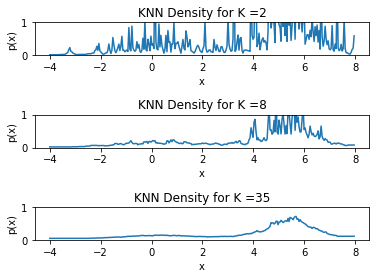

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust 
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=1.8)

from heapq import nsmallest

K=[2,8,35]
data=np.loadtxt('nonParamTrain.txt')
test=np.loadtxt('nonParamTest.txt')
lT=len(test)
z=np.arange(min(data), max(data), 0.02) ## z has all the points where pdf is calculated
p=[]  
#p=(K/500)*
counter=311
for k in K:
    for i in z:
        nearest_elements=nsmallest(k, data, key=lambda x: abs(x-i))   # finds K nestest values to i
        nearest_elements.append(i)  # including the point itself so as to handle the case when both data on same side
        volume=max(nearest_elements)-min(nearest_elements)
        p_d=(k/len(data))/volume;
        #p_d=(len(data))/volume;
        p.append(p_d)
    
    t = np.arange(-4, 8, 12/len(p))
    
    print(counter)
    plt.subplot(counter)
    plt.plot(t,p)
    plt.ylim(0,1)
    plt.title('KNN Density for K =%i' %k)
    plt.ylabel('p(x)')
    plt.xlabel('x')
    counter=counter+1
    lH=0
    for c in range(0,len(test)-1):
        #lH=lH+np.log(p[nsmallest(1, z, key=lambda x: abs(x-test[c]))]) # gets the nearest elemnt from p
          index= nsmallest(1, z, key=lambda x: abs(x-test[c]))-min(data) # gets the nearest elemnt from p
          index=int(sum(index)/0.02)
          lH=lH+np.log(p[index])       
    display(lH)  
    p=[]  # resetting the array for next time
